## What is Feature Engineering?  

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art.  
  
__Some words on feature engineering by the experts__  

- Feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success.

- Much of the success of machine learning is actually success in engineering features that a learner can understand.

- Actually the success of all Machine Learning algorithms depends on how you present the data.

- The algorithms we used are very standard for Kagglers. We spent most of our efforts in feature engineering.

- Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.
- Feature engineering turn your inputs into things the algorithm can understand.


In [1]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv('E:\Goeduhub_ML_Program_May_20\data\heights.csv')

In [3]:
df.head()

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


In [5]:

max_threshold=df['height'].quantile(0.9)
max_threshold

7.17

In [6]:
df[df['height']>max_threshold]

,name,height
11,ramesh,8.0
12,lokesh,7.2


In [16]:
min_threshold=df['height'].quantile(0.06)
min_threshold


4.086

In [17]:
df[df['height']<min_threshold]

,name,height
7,anil,1.2


In [18]:
df[df['height']>min_threshold]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


In [26]:
df[(df['height']>min_threshold) & (df['height']<max_threshold)]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


In [29]:
df=pd.read_csv(r'E:\Goeduhub_ML_Program_May_20\data\Bengaluru_House_Data.csv')

In [30]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [31]:

df.shape

(13320, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [33]:

df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [34]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [37]:
df.drop('area_type',axis=1).head()

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [39]:
mint,maxt=df['price'].quantile([0.01,0.9])
print(mint,maxt)

18.5 220.0


In [41]:

df[df['price']<maxt]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [44]:
df_new=df[(df['price']<maxt) & (df['price']>mint)]
df_new.shape

(11809, 9)

In [45]:
import seaborn as sns

<AxesSubplot:>

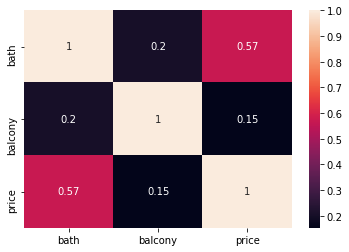

In [47]:
sns.heatmap(df_new.corr(),annot=True)

## Z score  
How many standard deviations are away from the mean

In [52]:
# Now read the first sample data set
df['Zscore']=(df['height']-df['height'].mean())/df['height'].std()

In [53]:
df

,name,height,Zscore
0,mohit,5.3,-0.238392
1,sakshi,5.2,-0.301363
2,arun,5.1,-0.364335
3,varun,4.9,-0.490278
4,ani,7.1,0.895094
5,amit,6.4,0.454294
6,amita,6.5,0.517265
7,anil,1.2,-2.820220
8,sudha,6.0,0.202408
9,ram,5.1,-0.364335


In [54]:
df.describe()

,height,Zscore
count,14.000000,1.400000e+01
mean,5.678571,-7.513831e-16
std,1.588022,1.000000e+00
min,1.200000,-2.820220e+00
25%,5.125000,-3.485918e-01
50%,5.750000,4.497959e-02
75%,6.475000,5.015224e-01
max,8.000000,1.461837e+00
